In [129]:
import numpy as np
import pandas as pd
from glob import glob 
from tqdm import tqdm
import seaborn as sns 

# for converting the text file containing the quarry locations into csv file
import csv

# for computing the geographical distance between two points 
import math


from sklearn.model_selection import train_test_split
#from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
#from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from datetime import datetime
#from sklearn.decomposition import PCA
#import lightgbm as lgb
import h5py
#from sklearn.model_selection import RepeatedKFold
#from sklearn.feature_selection import RFECV
#from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
#from sklearn.datasets import load_iris
from scipy import stats, signal
from sklearn.preprocessing import StandardScaler
import obspy
from obspy.geodetics.base import gps2dist_azimuth, gps2dist_azimuth
from obspy.clients.fdsn import Client
#import re
#from sklearn.model_selection import cross_val_predict
import time
##from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)
from joblib import dump, load
#import concurrent.futures
from obspy.signal.filter import envelope
import tsfel


## need to append the appropriate path for the download of appropriate features
#import sys
sys.path.append('../feature_extraction_scripts/physical_feature_extraction_scripts')
import seis_feature
from seis_feature import compute_physical_features
#from multiprocessing import Pool
from tsfel import time_series_features_extractor, get_features_by_domain
#import calendar
from datetime import timedelta


#import pickle


import os
import sys
sys.path.append('../common_scripts')


from common_processing_functions import apply_cosine_taper
from common_processing_functions import butterworth_filter

from zenodo_get import zenodo_get

In [2]:
## Some helpful functions in plotting 
def interquartile(df):

    # Set the lower and upper quantile thresholds (25% and 75%)
    lower_quantile = 0.01
    upper_quantile = 0.99

    # Filter the DataFrame based on the quantile range for all columns
    filtered_df = df[
        (df >= df.quantile(lower_quantile)) &
        (df <= df.quantile(upper_quantile))
    ]

    # Drop rows with any NaN values (if needed)
    #filtered_df = filtered_df.dropna(axis = 1)

    return filtered_df


## Downloading features from a repository on Zenodo

### Donwloading tsfel features from a 150s window

In [5]:
## Downloading tsfel features


## Downloading the physical features 
## This is doi for physical features (for both 50s and 150s) - 10.5281/zenodo.10689585
## This is doi for tsfel features of 50s window length - 10.5281/zenodo.10689673
## This is doi for tsfel features of 150s window length - 10.5281/zenodo.10689824

doi = '10.5281/zenodo.10689824'  #Downloading tsfel features for 150s length
# Download files from the Zenodo record
files = zenodo_get([doi])

Title: Tsfel Features for my study on Automatic Seismic Event Classification System in Pacific Northwest (150s)
Keywords: 
Publication date: 2024-02-21
DOI: 10.5281/zenodo.10689824
Total size: 1483.0 MB

Link: https://zenodo.org/record/10689824/files/tsfel_features_comcat_z_earthquake_50_100_part3.csv   size: 411.4 MB

Checksum is correct. (e2699d7b247688adc88aa974053d61a0)

Link: https://zenodo.org/record/10689824/files/tsfel_features_comcat_z_earthquake_50_100_part2.csv   size: 295.7 MB

Checksum is correct. (0426976c0a13d9e459b730962000b428)

Link: https://zenodo.org/record/10689824/files/tsfel_features_comcat_z_explosion_50_100.csv   size: 96.9 MB

Checksum is correct. (03b0d7d98ca50fa6d108ed88297d4c87)

Link: https://zenodo.org/record/10689824/files/tsfel_features_noise_50_100.csv   size: 314.8 MB

Checksum is correct. (74a2bb0aa317db40a35c77aa1a7de922)

Link: https://zenodo.org/record/10689824/files/tsfel_features_exotic_50_100.csv   size: 57.0 MB

Checksum is correct. (98b876afd

### Downloading physical features

In [6]:
## Downloading the physical features 
## This is doi for physical features (for both 50s and 150s) - 10.5281/zenodo.10689585
## This is doi for tsfel features of 50s window length - 10.5281/zenodo.10689673
## This is doi for tsfel features of 150s window length - 10.5281/zenodo.10689824

doi = '10.5281/zenodo.10689585'  #Downloading physical
# Download files from the Zenodo record
files = zenodo_get([doi])

Title: Physical Features for my study on Automatic Seismic Event Classification System in Pacific Northwest
Keywords: 
Publication date: 2024-02-20
DOI: 10.5281/zenodo.10689585
Total size: 375.7 MB

Link: https://zenodo.org/record/10689585/files/physical_features_noise_z_50_100.csv   size: 40.5 MB

Checksum is correct. (731c772d47171f5786caf5ee1d34f8b2)

Link: https://zenodo.org/record/10689585/files/physical_features_comcat_z_earthquake_50_100_part3.csv   size: 38.0 MB

Checksum is correct. (3134dad6f8b5fc6472b52ec82e8ed430)

Link: https://zenodo.org/record/10689585/files/physical_features_exotic_z_10_40.csv   size: 7.1 MB

Checksum is correct. (f3b2f662e920ce728ccd5eff2a422ea1)

Link: https://zenodo.org/record/10689585/files/physical_features_comcat_z_explosion_50_100.csv   size: 12.4 MB

Checksum is correct. (f1db652ed67939ef2c7b62e7eba3895d)

Link: https://zenodo.org/record/10689585/files/physical_features_comcat_z_earthquake_50_100_part2.csv   size: 38.7 MB

Checksum is correct. (

## Loading tsfel features

In [7]:
# These waveforms are filtered between 1-10 Hz
# extracting features of surface events, thunder and sonic booms
features_exotic_tsfel = pd.read_csv('tsfel_features_exotic_50_100.csv')




# features of noise
features_noise_tsfel = pd.read_csv('tsfel_features_noise_50_100.csv')





# features of explosion
features_explosion_tsfel = pd.read_csv('tsfel_features_comcat_z_explosion_50_100.csv')



# features of earthquake (had to extract it in three parts because of memory constraints)
features_eq1 = pd.read_csv('tsfel_features_comcat_z_earthquake_50_100_part1.csv')
features_eq2 = pd.read_csv('tsfel_features_comcat_z_earthquake_50_100_part2.csv')
features_eq3 = pd.read_csv('tsfel_features_comcat_z_earthquake_50_100_part3.csv')



# features of earthquakes
features_earthquake_tsfel = pd.concat([features_eq1, features_eq2, features_eq3])

## Removing highly correlated tsfel features

In [10]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(features_noise_tsfel.iloc[:, 1:390])


features_exotic_tsfel.drop(corr_features, axis=1, inplace=True)
features_noise_tsfel.drop(corr_features, axis=1, inplace=True)
features_explosion_tsfel.drop(corr_features, axis=1, inplace=True)
features_earthquake_tsfel.drop(corr_features, axis=1, inplace=True)

## Loading physical features

In [11]:
# extracting features of surface events, thunder and sonic booms
features_exotic_physical = pd.read_csv('physical_features_exotic_z_50_100.csv')

# features of noise
features_noise_physical = pd.read_csv('physical_features_noise_z_50_100.csv')


# features of explosion
features_explosion_physical = pd.read_csv('physical_features_comcat_z_explosion_50_100.csv')

# features of earthquakes
features_eq1 = pd.read_csv('physical_features_comcat_z_earthquake_50_100_part1.csv')
features_eq2 = pd.read_csv('physical_features_comcat_z_earthquake_50_100_part2.csv')
features_eq3 = pd.read_csv('physical_features_comcat_z_earthquake_50_100_part3.csv')
features_eq4 = pd.read_csv('physical_features_comcat_z_earthquake_50_100_part4.csv')

features_earthquake_physical = pd.concat([features_eq1, features_eq2, features_eq3, features_eq4])








## Removing the large files from the directory

In [14]:
# Get the current working directory
directory = os.getcwd()

# List the files in the directory
files = os.listdir(directory)

# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)

## Merging tsfel and physical features

In [15]:
features_noise = pd.merge(features_noise_physical, features_noise_tsfel, on = 'serial_no')
features_earthquake = pd.merge(features_earthquake_physical, features_earthquake_tsfel, on = 'serial_no')
features_explosion = pd.merge(features_explosion_physical, features_explosion_tsfel, on = 'serial_no')


features_surface_tsfel = features_exotic_tsfel[features_exotic_tsfel['source'] == 'surface']
features_sonic_tsfel = features_exotic_tsfel[features_exotic_tsfel['source'] == 'sonic']
features_thunder_tsfel = features_exotic_tsfel[features_exotic_tsfel['source'] == 'thunder']

features_surface_physical = features_exotic_physical[features_exotic_physical['source'] == 'surface']
features_sonic_physical = features_exotic_physical[features_exotic_physical['source'] == 'sonic']
features_thunder_physical = features_exotic_physical[features_exotic_physical['source'] == 'thunder']


features_surface = pd.merge(features_surface_physical, features_surface_tsfel, on = 'serial_no')
features_sonic = pd.merge(features_sonic_physical, features_sonic_tsfel, on = 'serial_no')
features_thunder = pd.merge(features_thunder_physical, features_thunder_tsfel, on = 'serial_no')



features_all = pd.concat([features_surface, features_sonic, features_thunder, features_noise, features_explosion, features_earthquake])

In [16]:
features_all = features_all.drop(['Unnamed: 0_x','Unnamed: 0_y', 'source_x'], axis = 1)
features_all.rename(columns={'source_y': 'source'}, inplace=True)
print(f'So we have {features_all.shape[0]} events and each event have {features_all.shape[1]} features')

So we have 240898 events and each event have 331 features


## Preprocessing the input features

In [17]:
# dropping the columns that contain NaNs
features_all = features_all.dropna(axis = 1)

# dropping the rows that contains NaNs
features_all = features_all.dropna()


## dropping all the rows containing infinity values
features_all = features_all.replace([np.inf, -np.inf], np.nan).dropna()


## dropping sonic boom and thunder events
features_all = features_all[features_all['source'] != 'sonic']
features_all = features_all[features_all['source'] != 'thunder']

print(f'So we have {features_all.shape[0]} events and each event have {features_all.shape[1]} features')


So we have 240543 events and each event have 330 features


## Dropping the columns that contain same values for all the events, as these features do not really contribute in classification

In [18]:
# Check unique values in each column
unique_counts = features_all.nunique()

# Identify columns with only one unique value (same value for all rows)
single_value_columns = unique_counts[unique_counts == 1].index


# Drop columns with the same value for all rows
features_all = features_all.drop(columns=single_value_columns)

print(f'So we have {features_all.shape[0]} events and each event have {features_all.shape[1]} features')


So we have 240543 events and each event have 316 features


## Removing the outliers

In [22]:
df = features_all.drop(['serial_no', 'source'], axis = 1)
# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(df))


# Define a threshold for Z-score beyond which data points are considered outliers
threshold = 4

# Filter out rows with any Z-score greater than the threshold
# Temporarily removing this 
outliers_removed_df =   features_all[(z_scores < threshold).all(axis=1)]

print(len(features_all))
print(len(outliers_removed_df))


/home/ak287/miniconda3/envs/roses_2021/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


240543
172665


## Standardizing the features

In [37]:
## defining the global variables X and y
X = outliers_removed_df.drop(['serial_no','source'], axis = 1)
y = outliers_removed_df['source']


# Initialize the StandardScaler
scaler = StandardScaler()



# Apply standard scaling to the DataFrame
scaled_features = scaler.fit_transform(X)


# Access the mean and standard deviation for each feature
means = scaler.mean_
std_devs = scaler.scale_

# Create a DataFrame to display the means and standard deviations
scaler_params = pd.DataFrame({'Feature': X.columns, 'Mean': means, 'Std Dev': std_devs})
print(scaler_params)


# Create a new DataFrame with scaled features
X_scaled = pd.DataFrame(scaled_features, columns=X.columns)


#We are not standardizing at this stage. We will rather wait when the outlier are removed, then we will
## standardize and save the standard scaler parameters. 
X_scaled = X

X_scaled['serial_no'] = outliers_removed_df['serial_no'].values
X_scaled['source'] = outliers_removed_df['source'].values

/home/ak287/miniconda3/envs/roses_2021/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1745: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


                       Feature         Mean     Std Dev
0                  RappMaxMean    22.575937   16.419466
1                RappMaxMedian    63.834727  136.654765
2                        AsDec     0.909845    1.097600
3                     KurtoSig    54.478770   61.446183
4                     KurtoEnv    55.242929   54.918849
..                         ...          ...         ...
309              0_Median diff     0.000013    0.000139
310  0_Negative turning points  1104.651151  179.114040
311      0_Neighbourhood peaks   577.355202   83.654089
312    0_Peak to peak distance     1.847835    0.106387
313       0_Zero crossing rate  1427.796398  391.521056

[314 rows x 3 columns]


## Merging the Metadata information with features

In [38]:
# extracting the stored data
comcat_file_name = h5py.File("/data/whd01/yiyu_data/PNWML/comcat_waveforms.hdf5",'r')
exotic_file_name = h5py.File("/data/whd01/yiyu_data/PNWML/exotic_waveforms.hdf5",'r')
noise_file_name = h5py.File("/data/whd01/yiyu_data/PNWML/noise_waveforms.hdf5",'r')


# extracting the catalog
comcat_file_csv = pd.read_csv("/data/whd01/yiyu_data/PNWML/comcat_metadata.csv")
exotic_file_csv = pd.read_csv("/data/whd01/yiyu_data/PNWML/exotic_metadata.csv")
noise_file_csv = pd.read_csv("/data/whd01/yiyu_data/PNWML/noise_metadata.csv")



# extracting the metadata corresponding to individual events
cat_exp = comcat_file_csv[comcat_file_csv['source_type'] == 'explosion']
cat_eq = comcat_file_csv[comcat_file_csv['source_type'] == 'earthquake']
cat_no = noise_file_csv
cat_su = exotic_file_csv[exotic_file_csv['source_type'] == 'surface event']



# extracting the index 
ind_exp = X_scaled[X_scaled['source'] == 'explosion']['serial_no'].values
ind_eq = X_scaled[X_scaled['source'] == 'earthquake']['serial_no'].values
ind_no = X_scaled[X_scaled['source'] == 'noise']['serial_no'].values
ind_su = X_scaled[X_scaled['source'] == 'surface']['serial_no'].values


df_exp = X_scaled[X_scaled['source'] == 'explosion']
exp_df = cat_exp.iloc[ind_exp]
exp_df['serial_no'] = ind_exp


df_eq = X_scaled[X_scaled['source'] == 'earthquake']
eq_df = cat_eq.iloc[ind_eq]
eq_df['serial_no'] = ind_eq



df_no = X_scaled[X_scaled['source'] == 'noise']
no_df = cat_no.iloc[ind_no]
no_df['serial_no'] = ind_no



df_su = X_scaled[X_scaled['source'] == 'surface']
su_df = cat_su.iloc[ind_su]
su_df['serial_no'] = ind_su





new_exp = pd.merge(df_exp,exp_df, on = 'serial_no')
new_eq = pd.merge(df_eq,eq_df, on = 'serial_no')
new_su = pd.merge(df_su,su_df, on = 'serial_no')
new_no = pd.merge(df_no,no_df, on = 'serial_no')
new_no['event_id'] = np.array(['noise'+str(i) for i in np.arange(len(new_no))])



X_final = pd.concat([new_exp, new_eq, new_su, new_no])
y = ['explosion']*len(new_exp)+['earthquake']*len(new_eq)+['surface']*len(new_su)+['noise']*len(new_no)



/home/ak287/miniconda3/envs/roses_2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


### Adding Hour of the Day, Days of Week and Month of Year as additional features as they have shown to significantly increase the performance of the machine learning model

In [39]:
# new_exp contains the features and the corresponding metadata information. 
datetimes = X_final['trace_start_time'].values

hour_of_day = []
days_of_week = []
month_of_year = []
for dt_str in tqdm(datetimes):
        
    # Parse the datetime string
        dt = datetime.strptime(dt_str, '%Y-%m-%dT%H:%M:%S.%fZ')
        hod = dt.hour - 8.  # converting to local time. 
        moy = dt.month
        
        
        days_of_week.append(dt.weekday())
        hour_of_day.append(hod)
        month_of_year.append(moy)
        
X_final['hour_of_day'] = hour_of_day
X_final['day_of_week'] = days_of_week
X_final['month_of_year'] = month_of_year


100%|██████████| 172665/172665 [00:01<00:00, 145776.56it/s]


## Standardizing the features

In [61]:
temp_X = X_final.iloc[:,0:314]
#temp_X = temp_X.assign(hod=X_final['hour_of_day'].values, dow=X_final['day_of_week'].values, moy=X_final['month_of_year'].values)



# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the DataFrame
scaled_features = scaler.fit_transform(temp_X)

# Create a new DataFrame with scaled features
temp_X = pd.DataFrame(scaled_features, columns= temp_X.columns)



/home/ak287/miniconda3/envs/roses_2021/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1745: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


## Hyperparameter tuning of the random forest model for binary classification

In [59]:
# Apply random undersampling using imbalanced-learn library
rus = RandomUnderSampler(sampling_strategy={'earthquake':3000, 'explosion':3000, 'surface':0, 'noise':0})
X_resampled, y_resampled = rus.fit_resample(temp_X, y)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the text labels and transform them to numeric labels
y_num = label_encoder.fit_transform(y_resampled)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_num, test_size=0.2, stratify = y_num)



# Define the hyperparameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize the RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=50, scoring='f1_macro', cv=10, verbose=2, random_state=42, n_jobs=-1
)

# Perform randomized grid search cross-validation
random_search.fit(X_train, y_train)

# Print the best parameters and their corresponding accuracy score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Test Accuracy:", accuracy)




Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Accuracy: 0.9227006431538974
Test Accuracy: 0.9183333333333333


## Performance with the best model

Text(0.5, 1.0, 'Total samples: 1200')

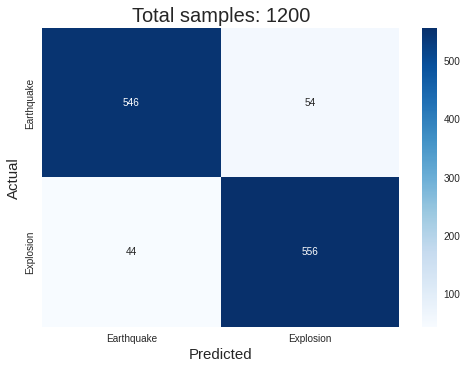

In [60]:
## Performance with best model

plt.style.use('seaborn')
cm = confusion_matrix(y_test, y_pred)


labels = ['Earthquake', 'Explosion']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.title('Total samples: '+str(len(y_pred)), fontsize = 20)



## Classification report with the best model

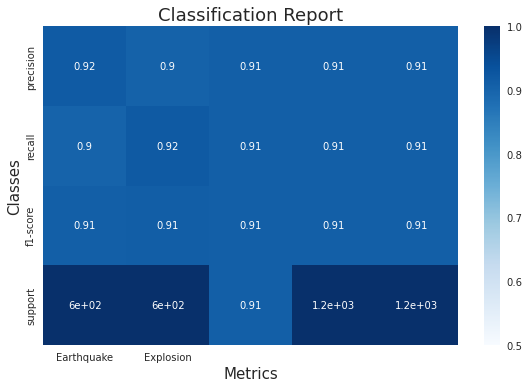

In [57]:
# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)
labels = ['Earthquake', 'Explosion']

# Set a pleasing style
sns.set_style("whitegrid")

# Create a figure and axes for the heatmap
plt.figure()
ax = sns.heatmap(pd.DataFrame(report), annot=True, cmap='Blues', xticklabels=labels, vmin=0.5, vmax=1)

# Set labels and title
ax.set_xlabel('Metrics', fontsize=15)
ax.set_ylabel('Classes', fontsize=15)
ax.set_title('Classification Report', fontsize=18)

# Create a colorbar
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0.5, 1])  # Set custom tick locations
#cbar.set_ticklabels(['0', '0.5', '1'])  # Set custom tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Computing the feature importance

In [63]:
num_iter = 10
f_imp = []

for i in tqdm(range(num_iter)):

    # Apply random undersampling using imbalanced-learn library
    rus = RandomUnderSampler(sampling_strategy={'earthquake':3000, 'explosion':3000, 'surface':0, 'noise':0})
    X_resampled, y_resampled = rus.fit_resample(temp_X, y)

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Fit the LabelEncoder on the text labels and transform them to numeric labels
    y_num = label_encoder.fit_transform(y_resampled)


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_num, test_size=0.2, stratify = y_num)

    # Perform randomized grid search cross-validation
    best_model.fit(X_train, y_train)


    f_imp.append(best_model.feature_importances_)

 90%|█████████ | 9/10 [02:15<00:14, 14.98s/it]

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  14.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  37.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  36.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   8.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.3s
[CV] END bootstrap=False, max_depth=20, 

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   9.8s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  14.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  20.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  29.0s
[CV] END bootstrap=True, max_depth=30, ma

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  14.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  37.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   9.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  22.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=30

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.5s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  35.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  20.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  14.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  21.8s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  17.4s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  15.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   9.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.1s
[CV] END bootstrap=False, max_depth=4

100%|██████████| 10/10 [02:30<00:00, 15.05s/it]


In [65]:
final_imp = np.mean(f_imp, axis = 0)
features = X_train.columns.values
feature_colors = ['darkred']*60+['darkblue']*(len(features)-60)  # red for physical and blue for tsfel features. 


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  14.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  35.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  23.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  10.7s
[CV] END bootstrap=True, max_depth=None,

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  14.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  35.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.6s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  17.4s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  10.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  12.0s
[CV] END bootstrap=False, max_depth=4

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  15.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   9.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  13.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  36.0s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  15.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  20.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  23.3s
[CV] END bootstrap=False, max_depth=Non

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  15.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  11.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   9.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.8s
[CV] END bootstrap=False, max_depth=40, 

In [66]:
# Save the array to disk
np.save('../results/final_imp_binary.npy', final_imp)

In [93]:
final_imp = np.load('../results/final_imp_binary.npy')
features = X_train.columns.values
feature_colors = ['darkred']*60+['darkblue']*(len(features)-60)

In [94]:
# Removing the initial number from the tsfel features names
new_features = []
for i in range(len(features)):
    try:
        new_features.append(features[i].split('0_')[1])
    except:
        new_features.append(features[i].split('0_')[0])

## Plotting the most important features for binary discrimination

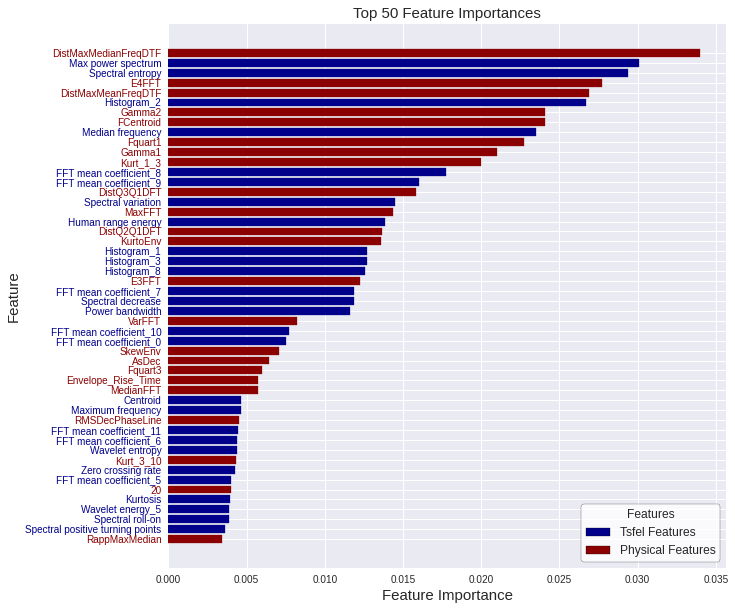

In [95]:
# Sample feature importances and feature labels
feature_importances = final_imp
feature_labels = new_features

# Sort feature importances and feature labels together
sorted_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_labels = [feature_labels[i] for i in sorted_indices]
colors = [feature_colors[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 10))
bars = plt.barh(sorted_feature_labels[0:50], sorted_feature_importances[0:50])

# Color bars to match yticklabels
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Color yticklabels
for label, color in zip(plt.gca().get_yticklabels(), colors):
    label.set_color(color)

# Create legend handles and labels
legend_handles = [plt.Rectangle((0,0),1,1, color='darkblue', ec='black'), plt.Rectangle((0,0),1,1, color='darkred', ec='black')]
legend_labels = ['Tsfel Features', 'Physical Features']

plt.legend(legend_handles, legend_labels, title='Features', fontsize='large', title_fontsize='large', frameon=True, facecolor='white', edgecolor='black')

plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title('Top 50 Feature Importances', fontsize=15)
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()


## Plotting the distribution of Imp features

/tmp/ipykernel_605067/3690293484.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df >= df.quantile(lower_quantile)) &
/tmp/ipykernel_605067/3690293484.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df <= df.quantile(upper_quantile))


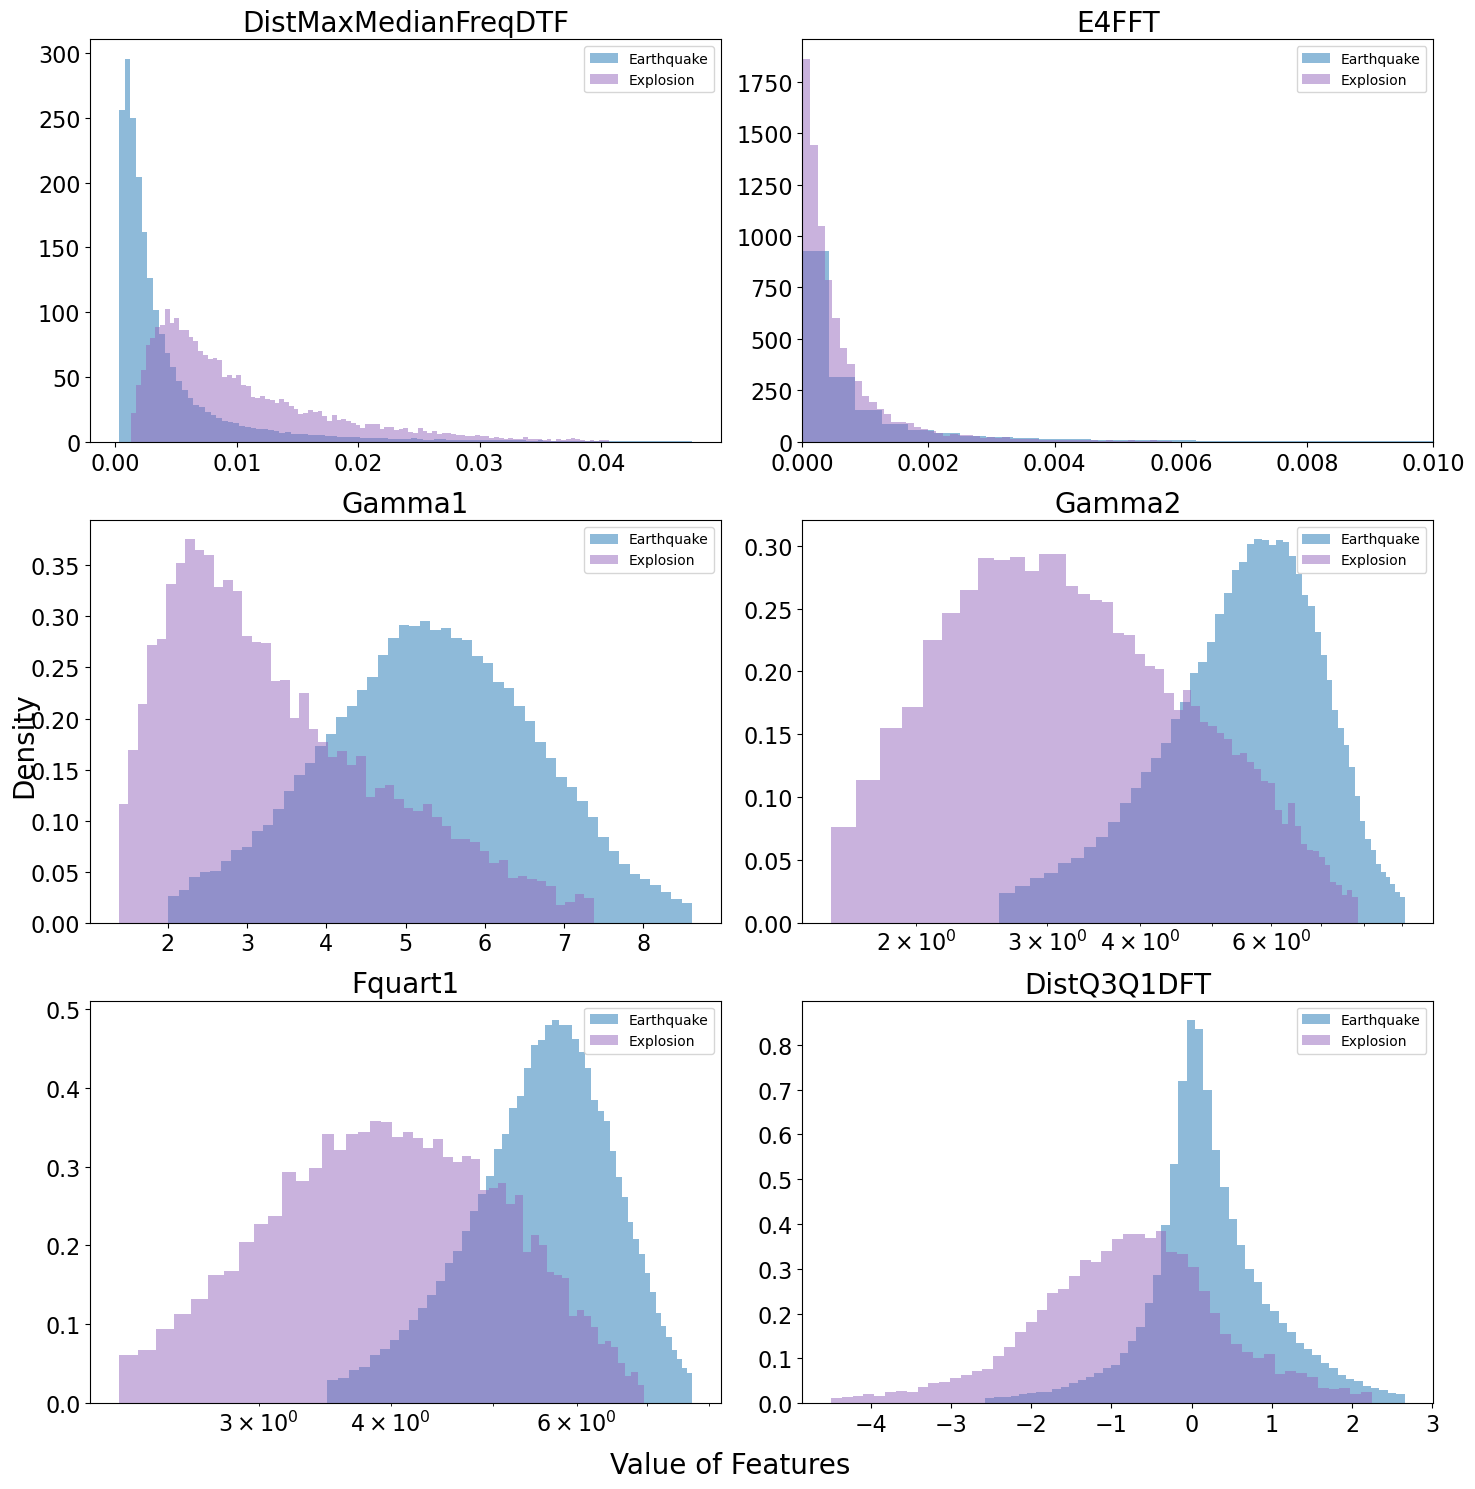

In [96]:
no_df = features_noise_physical
eq_df = features_earthquake_physical
su_df = features_exotic_physical[features_exotic_physical['source'] == 'surface']
exp_df = features_explosion_physical


filtered_no = interquartile(no_df)
filtered_su = interquartile(su_df)
filtered_eq = interquartile(eq_df)
filtered_exp = interquartile(exp_df)


plt.style.use('default')
# Set rc parameters for font size
plt.rcParams['xtick.labelsize'] = 16  # Font size for xtick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for ytick labels

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = [15,15])

feature = 'DistMaxMedianFreqDTF' ## The time taken to reach the maximum amplitude of Envelope


l1 = 0
l2 = 1000

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 100 #int(np.ceil(data_range / 0.5))
#ax[0,0].hist(x= filtered_no[feature].values, bins= num_bins, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[0,0].hist(x= filtered_su[feature].values, bins= num_bins,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[0,0].hist(x= filtered_eq[feature].values, bins= num_bins,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[0,0].hist(x= filtered_exp[feature].values, bins=num_bins,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[0,0].legend()
#ax[0,0].set_xscale('log')
#ax[0,0].set_yscale('log')
#ax[0,0].set_xlim(l1,l2)


ax[0,0].set_title(feature, fontsize = 20)


feature = 'E4FFT' ## The time taken to reach the maximum amplitude of Envelope


l1 = 0
l2 = 0.01

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 100 #int(np.ceil(data_range / 0.5))
#ax[0,1].hist(x= filtered_no[feature].values, bins= num_bins, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[0,1].hist(x= filtered_su[feature].values, bins= num_bins,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[0,1].hist(x= filtered_eq[feature].values, bins= num_bins+2900,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[0,1].hist(x= filtered_exp[feature].values, bins=num_bins - 50,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[0,1].legend()
#ax[0,1].set_xscale('log')
#ax[0,1].set_yscale('log')
ax[0,1].set_xlim(l1,l2)


ax[0,1].set_title(feature, fontsize = 20)



feature = 'Gamma1' ## The Kurtosis of envelope


l1 = 0
l2 = 10

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 50 #int(np.ceil(data_range / 0.5))
#ax[1,0].hist(x= filtered_no[feature].values, bins= 400, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[1,0].hist(x= filtered_su[feature].values, bins= 50,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[1,0].hist(x= filtered_eq[feature].values, bins= 50,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[1,0].hist(x= filtered_exp[feature].values, bins= 50,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[1,0].legend()
#ax[1,0].set_yscale('log')
#ax[1,0].set_xscale('log')
#ax[1,0].set_xlim(l1,l2)


ax[1,0].set_title(feature, fontsize = 20)



feature = 'Gamma2' ## ratio of Max over median of envelope


l1 = 0
l2 = 0.01

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 50 #int(np.ceil(data_range / 0.5))
#ax[1,1].hist(x= filtered_no[feature].values, bins= 500, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[1,1].hist(x= filtered_su[feature].values, bins= num_bins,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[1,1].hist(x= filtered_eq[feature].values, bins= 50,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[1,1].hist(x= filtered_exp[feature].values, bins=num_bins,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[1,1].legend(loc = 'upper right')
ax[1,1].set_xscale('log')
#ax[1,1].set_yscale('log')
#ax[1,1].set_xlim(l1,l2)


ax[1,1].set_title(feature, fontsize = 20)


feature = 'Fquart1' ## ratio of Max over median of envelope


l1 = 0
l2 = 0.01

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 50 #int(np.ceil(data_range / 0.5))
#ax[1,1].hist(x= filtered_no[feature].values, bins= 500, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[1,1].hist(x= filtered_su[feature].values, bins= num_bins,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[2,0].hist(x= filtered_eq[feature].values, bins= 50,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[2,0].hist(x= filtered_exp[feature].values, bins=num_bins,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[2,0].legend(loc = 'upper right')
ax[2,0].set_xscale('log')
#ax[1,1].set_yscale('log')
#ax[1,1].set_xlim(l1,l2)


ax[2,0].set_title(feature, fontsize = 20)




feature = 'DistQ3Q1DFT' ## ratio of Max over median of envelope


l1 = 0
l2 = 0.01

#all_df = features_all
#data_range = all_df[feature].values.ptp()
num_bins = 50 #int(np.ceil(data_range / 0.5))
#ax[1,1].hist(x= filtered_no[feature].values, bins= 500, density = True,
#          color =  '#d62728', alpha = 0.5,label = 'Noise')
#ax[1,1].hist(x= filtered_su[feature].values, bins= num_bins,density = True,    
#          color = '#2ca02c', alpha = 0.5, label = 'Surface')
ax[2,1].hist(x= filtered_eq[feature].values, bins= 50,density = True,  
               color = '#1f77b4', alpha = 0.5, label = 'Earthquake')
ax[2,1].hist(x= filtered_exp[feature].values, bins=num_bins,density = True,  
   color = '#9467bd', alpha = 0.5, label = 'Explosion')

ax[2,1].legend(loc = 'upper right')
#ax[2,1].set_xscale('log')
#ax[1,1].set_yscale('log')
#ax[1,1].set_xlim(l1,l2)


ax[2,1].set_title(feature, fontsize = 20)






fig.supylabel('Density', fontsize = 20)
fig.supxlabel('Value of Features', fontsize = 20)
fig.tight_layout()

### Plotting the most important tsfel features

/tmp/ipykernel_605067/3690293484.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df >= df.quantile(lower_quantile)) &
/tmp/ipykernel_605067/3690293484.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df <= df.quantile(upper_quantile))


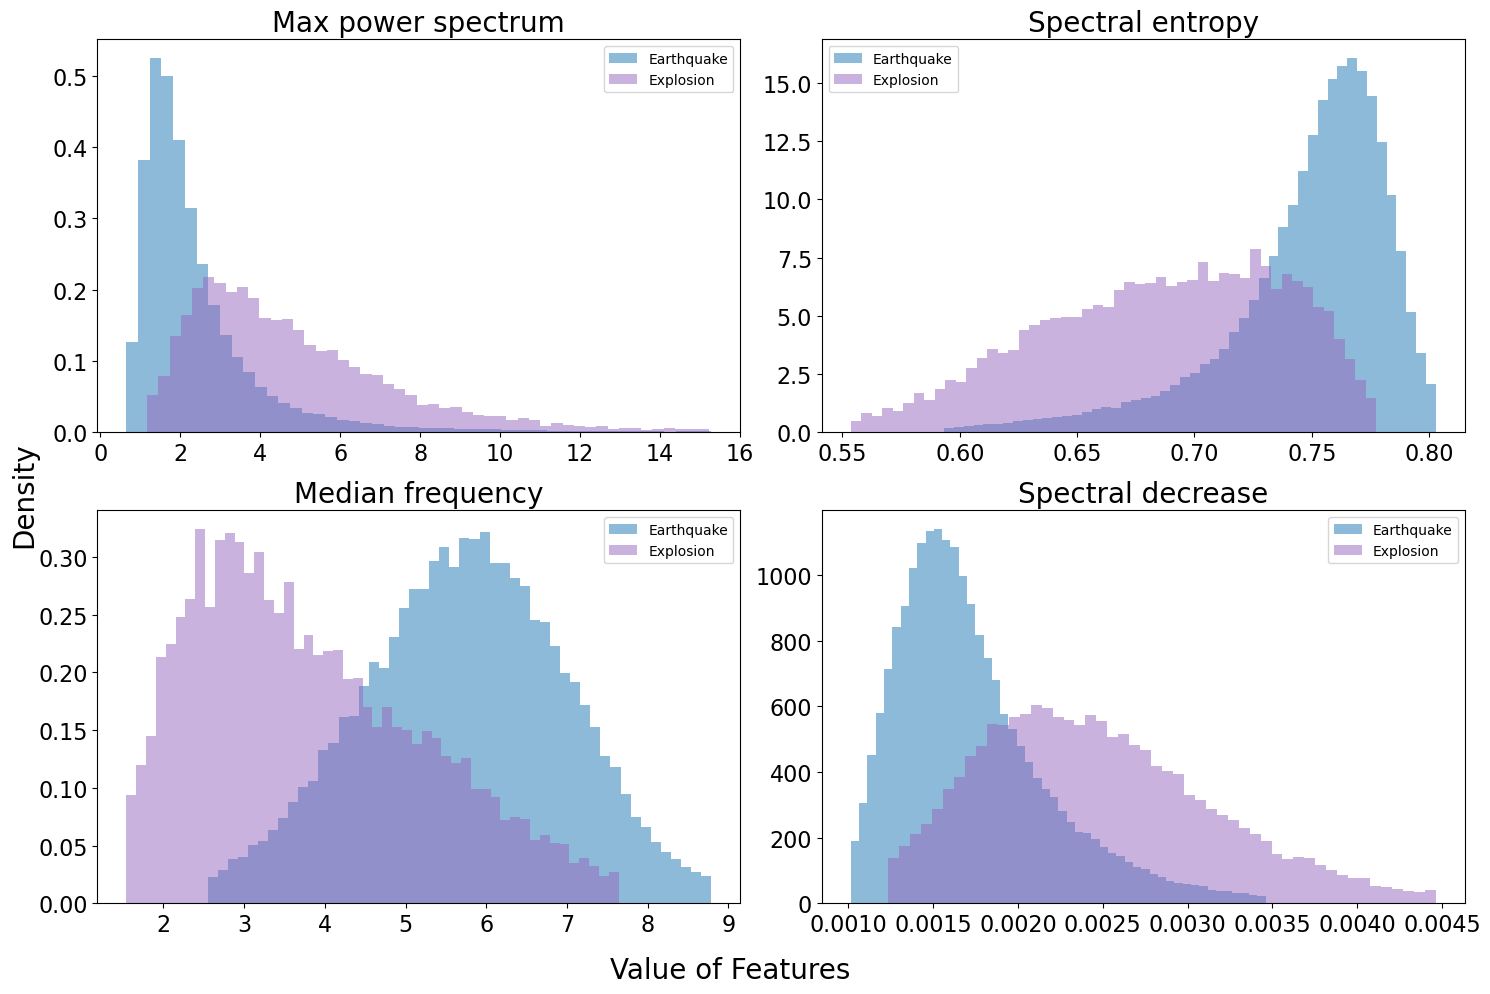

In [104]:
no_df = features_noise_tsfel
eq_df = features_earthquake_tsfel
su_df = features_exotic_tsfel[features_exotic_tsfel['source'] == 'surface']
exp_df = features_explosion_tsfel

filtered_no = interquartile(no_df)
filtered_su = interquartile(su_df)
filtered_eq = interquartile(eq_df)
filtered_exp = interquartile(exp_df)


# Define a function for histogram plotting
def plot_histogram(ax, feature_data, label, color, num_bins, title):
    ax.hist(x=feature_data, bins=num_bins, density=True, color=color, alpha=0.5, label=label)
    ax.legend()
    ax.set_title(title, fontsize=20)

# Define common parameters
num_bins = 50
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[15, 10])

# Define features and labels
features = {
    '0_Max power spectrum': [filtered_eq, filtered_exp],
    '0_Spectral entropy': [filtered_eq, filtered_exp],
    '0_Median frequency': [filtered_eq, filtered_exp],
    '0_Spectral decrease': [filtered_eq, filtered_exp]
}
labels = ['Earthquake', 'Explosion']
colors = ['#1f77b4', '#9467bd']

# Iterate over features and plot histograms
for idx, (feature, (filtered_eq, filtered_exp)) in enumerate(features.items()):
    row = idx // 2
    col = idx % 2
    plot_histogram(ax[row, col], filtered_eq[feature].values, labels[0], colors[0], num_bins, feature.split('_')[1])
    plot_histogram(ax[row, col], filtered_exp[feature].values, labels[1], colors[1], num_bins, feature.split('_')[1])

fig.supylabel('Density', fontsize=20)
fig.supxlabel('Value of Features', fontsize=20)
fig.tight_layout()
plt.show()


## Selecting 5000 random events per class for training and testing on all the remaining data

In [105]:
## extracting metadata information for each kind of source along with features
a_eq = X_final[X_final['source_type_pnsn_label'] == 'eq']
## removing the ambiguous events
a_eq = a_eq[a_eq['source_type'] != 'explosion']

a_px = X_final[X_final['source_type_pnsn_label'] == 'px']
# removing the ambiguous events. 
a_px = a_px[a_px['source_type'] != 'earthquake']

a_su = X_final[X_final['source_type'] == 'surface event']
a_no = X_final[X_final['source_type'] == 'noise']



## extracting the event ids corresponding to each catalog
eq_ids = np.unique(a_eq['event_id'].values)
su_ids = np.unique(a_su['event_id'].values)
no_ids = np.unique(a_no['event_id'].values)
px_ids = np.unique(a_px['event_id'].values)


## defining the events for training and testing in 70:30 ratio


"""

Modifying this section a bit, for a fair comparison to deep neural network. 


train_eq = eq_ids[0:int(0.7*len(eq_ids))]
train_px = px_ids[0:int(0.7*len(px_ids))]
train_su = su_ids[0:int(0.7*len(su_ids))]
train_no = no_ids[0:int(0.7*len(no_ids))]


test_eq = eq_ids[int(0.7*len(eq_ids)):len(eq_ids)]
test_px = px_ids[int(0.7*len(px_ids)):len(px_ids)]
test_su = su_ids[int(0.7*len(su_ids)):len(su_ids)]
test_no = no_ids[int(0.7*len(no_ids)):len(no_ids)]


"""


# Set the seed for reproducibility
np.random.seed(42)



## randomizing along the time. 
r1 = np.random.randint(0, len(eq_ids), 5000)
train_eq = eq_ids[r1]

## randomizing along the time. 
r2 = np.random.randint(0, len(px_ids), 5000)
train_px = px_ids[r2]

## randomizing along the time. 
r3 = np.random.randint(0, len(su_ids), 5000)
train_su = su_ids[r3]

## randomizing along the time
r4 = np.random.randint(0, len(no_ids), 5000)
train_no = no_ids[r4]



mask_eq = np.ones(eq_ids.shape, dtype = bool)
mask_eq[r1] = False

mask_px = np.ones(px_ids.shape, dtype = bool)
mask_px[r2] = False

mask_su = np.ones(su_ids.shape, dtype = bool)
mask_su[r3] = False

mask_no = np.ones(no_ids.shape, dtype = bool)
mask_no[r4] = False

test_eq = eq_ids[mask_eq]
test_px = px_ids[mask_px]
test_su = su_ids[mask_su]
test_no = no_ids[mask_no]



# concatenating training ids
all_train_ids = np.concatenate([train_eq,train_px])

# concatenating testing ids
all_test_ids = np.concatenate([test_eq,test_px,])

# allocating event id as index
X_final.index = X_final['event_id'].values


# extracting training and testing values
X_train = X_final.loc[all_train_ids]
X_test = X_final.loc[all_test_ids]



Y_train = X_train['source_type'].values
Y_test = X_test['source_type'].values

## Performance with manual features added

In [106]:
# Case 1: without adding anything manual
## Check the performance 
x_train = X_train.iloc[:, 0:314]
x_train = x_train.assign(hod=X_train['hour_of_day'].values, dow=X_train['day_of_week'].values, moy=X_train['month_of_year'].values)

x_test = X_test.iloc[:, 0:314]
x_test = x_test.assign(hod=X_test['hour_of_day'].values, dow=X_test['day_of_week'].values, moy=X_test['month_of_year'].values)



## Training on 5000 traces per class and testing on all the remaining

In [107]:
# initiating a random undersampler
rus = RandomUnderSampler(sampling_strategy={'earthquake':5000, 'explosion':5000}, random_state = 42)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Converting the textual labels into numerical labels
y_num_test = label_encoder.fit_transform(Y_test)


# randomly taking 5000 samples per class from the training dataset
X_resampled, y_resampled = rus.fit_resample(x_train, Y_train)


# Fit the LabelEncoder on the text labels and transform them to numeric labels
y_num_res = label_encoder.fit_transform(y_resampled)



best_model.class_weight  = None
best_model.fit(X_resampled, y_num_res)




RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=5, n_estimators=200, random_state=42)

## Trace wise performance

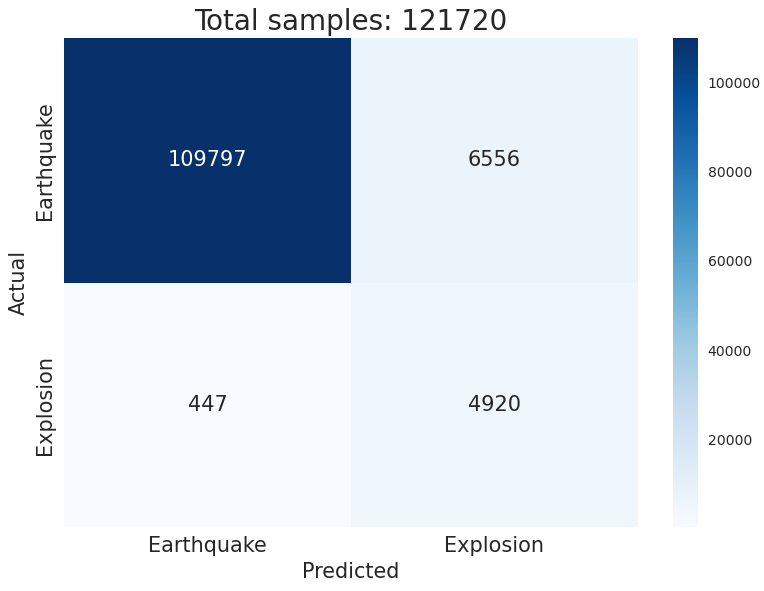

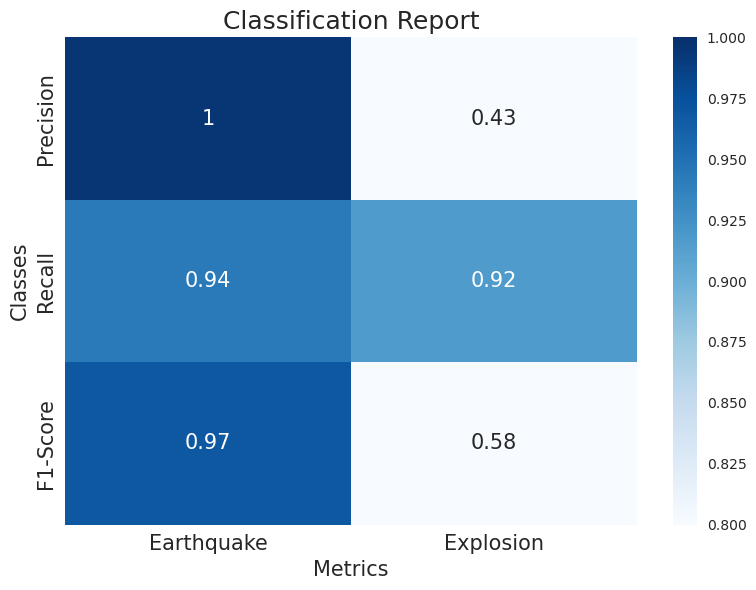

In [109]:
## Trace wise performance 

y_pred = best_model.predict(x_test)
plt.style.use('seaborn')
trace_cm_phy_tsf_man = confusion_matrix(y_num_test, y_pred)


class_labels = ['Earthquake', 'Explosion']
plt.figure(figsize = [8,6])

# Set annotation font size within each block
annot_kws = {"fontsize": 15}
ax = sns.heatmap(trace_cm_phy_tsf_man, annot=True, cmap='Blues', fmt='d', xticklabels = class_labels, yticklabels = class_labels, annot_kws=annot_kws)


# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(class_labels, fontsize=15)


plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.title('Total samples: '+str(len(y_pred)), fontsize = 20)
plt.tight_layout()


# Calculate the classification report
trace_report_phy_tsf_man = classification_report(y_num_test, y_pred, output_dict=True)
labels = ['Precision', 'Recall', 'F1-Score']

# Set a pleasing style
sns.set_style("whitegrid")

# Create a figure and axes for the heatmap
plt.figure(figsize = [8,6])
ax = sns.heatmap(pd.DataFrame(trace_report_phy_tsf_man).iloc[:3, :2], annot=True, cmap='Blues', yticklabels = labels, xticklabels=class_labels, vmin=0.8, vmax=1, annot_kws=annot_kws)

# Set labels and title
# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)

ax.set_xlabel('Metrics', fontsize=15)
ax.set_ylabel('Classes', fontsize=15)
ax.set_title('Classification Report', fontsize=18)

# Create a colorbar
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0.5, 1])  # Set custom tick locations
#cbar.set_ticklabels(['0', '0.5', '1'])  # Set custom tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Event Wise performance

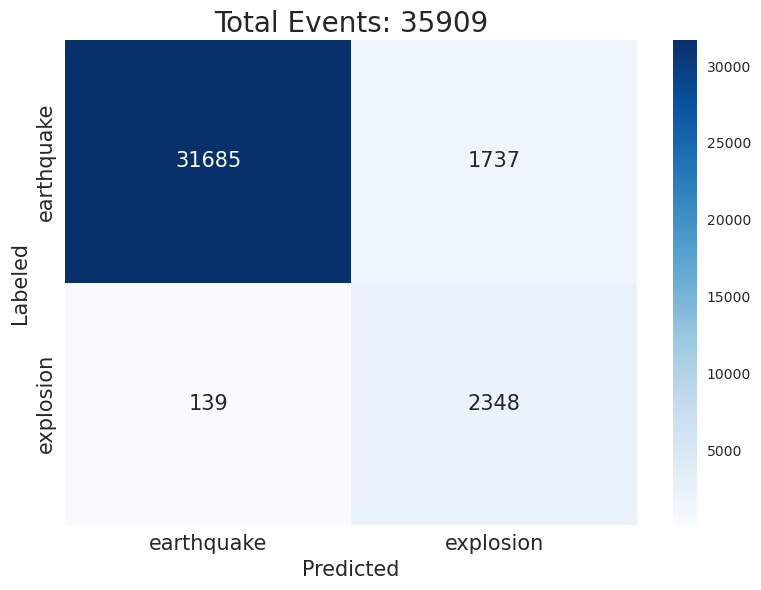

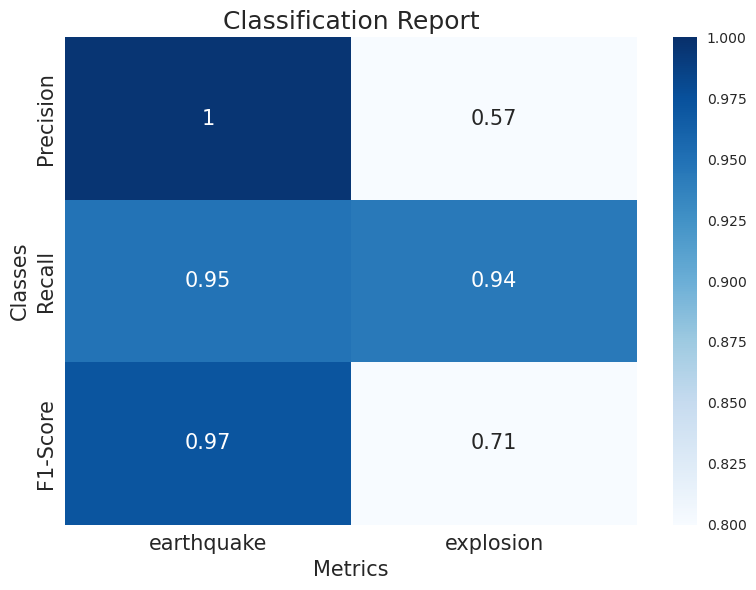

In [110]:
probs_all = best_model.predict_proba(x_test)

X_test['labelled'] = y_num_test
X_test['classified'] = y_pred
X_test['eq_probability'] = probs_all[:,0]
X_test['px_probability'] = probs_all[:,1]



mean_labels = X_test.groupby('event_id').mean()['labelled'].values
mean_ids = X_test.groupby('event_id').mean().index.values



mean_eq_prob = X_test.groupby('event_id').mean()['eq_probability'].values
mean_px_prob = X_test.groupby('event_id').mean()['px_probability'].values




## Assigning an event class based on the maximum average probability across the stations. 
temp_class = np.argmax(np.vstack([mean_eq_prob, mean_px_prob]), axis = 0)
## Computing the maximum averaged probability. 
temp_probs = np.max(np.vstack([mean_eq_prob, mean_px_prob]), axis = 0)



cf_events_phy_tsf_man = confusion_matrix(mean_labels, temp_class)
#cf_norm = cf_events/np.sum(cf_events, axis = 1, keepdims = True)
class_labels = ['earthquake','explosion']

plt.figure(figsize = [8, 6])
ax = sns.heatmap(cf_events_phy_tsf_man, annot = True, cmap='Blues', xticklabels = class_labels, yticklabels = class_labels,  fmt="1.0f", annot_kws=annot_kws)
# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(class_labels, fontsize=15)

ax.set_xlabel('Predicted', fontsize = 15)
ax.set_ylabel('Labeled', fontsize = 15)
ax.set_title('Total Events: '+str(len(mean_labels)), fontsize = 20)
plt.tight_layout()




# Calculate the classification report
report_event_phy_tsf_man = classification_report(mean_labels, temp_class, output_dict=True)
labels = ['Precision', 'Recall', 'F1-Score']

# Set a pleasing style
sns.set_style("whitegrid")

# Create a figure and axes for the heatmap
plt.figure(figsize = [8,6])
ax = sns.heatmap(pd.DataFrame(report_event_phy_tsf_man).iloc[:3, :2], annot=True, cmap='Blues', yticklabels=labels, xticklabels = class_labels,  vmin=0.8, vmax=1,  annot_kws=annot_kws)

# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)

# Set labels and title
ax.set_xlabel('Metrics', fontsize=15)
ax.set_ylabel('Classes', fontsize=15)
ax.set_title('Classification Report', fontsize=18)

# Create a colorbar
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0.5, 1])  # Set custom tick locations
#cbar.set_ticklabels(['0', '0.5', '1'])  # Set custom tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Analysis of misclassified events

In [111]:
# probabilities corresponding to misclassified events
misclassified_probs = temp_probs[np.where(mean_labels != temp_class)]

# classification provided to misclassified events
misclassified_class = temp_class[np.where(mean_labels != temp_class)]

# labels provided to misclassified events. 
misclassified_labels = mean_labels[np.where(mean_labels != temp_class)]

# event ids provided to misclassified events. 
misclassified_ids = mean_ids[np.where(mean_labels != temp_class)]

# event ids from misclassified events where mean probabilities exceed 0.8
misclassified_high_prob = misclassified_ids[np.where(misclassified_probs > 0.8)]


# Dataframe of misclassified events
misclassified_X = X_test.loc[misclassified_high_prob]



## New objectives

- download more stations data for each of the misclassified events. 
- extract features
- classify them and see if they still going to be misclassified. 

In [139]:
mis_ids = X_test.loc[misclassified_ids].groupby(level=0).size()
#indices_with_value_one = misclassified_ids[misclassified_ids == 1].index
single_station_event = mis_ids[mis_ids < 3].index.values

## Downloading more station waveforms for each of the single event. 

In [140]:
X_test.loc[single_station_event]

,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,Energy1/3Cor,Energy2/3Cor,int_ratio,E_0.1_1,E_1_3,E_3_10,E_10_20,E_20_50,Kurt_0.1_1,Kurt_1_3,Kurt_3_10,Kurt_10_20,Kurt_20_50,RMSDecPhaseLine,MeanFFT,MaxFFT,FMaxFFT,MedianFFT,VarFFT,FCentroid,Fquart1,Fquart3,NPeakFFT,MeanPeaksFFT,E1FFT,E2FFT,E3FFT,E4FFT,Gamma1,Gamma2,KurtoMaxDFT,KurtoMedianDFT,MaxOverMeanDFT,MaxOverMedianDFT,NbrPeaksMaxDFT,NbrPeaksMeanDFT,NbrPeaksMedianDFT,45/46,45/47,NbrPeaksCentralFreq,NbrPeaksMaxFreq,50/51,DistMaxMeanFreqDTF,DistMaxMedianFreqDTF,DistQ2Q1DFT,DistQ3Q2DFT,DistQ3Q1DFT,Peak_Envelope_Amplitude,Average_Envelope_Amplitude,Envelope_Area,Envelope_Velocity,Envelope_Rise_Time,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,0_FFT mean coefficient_37,0_FFT mean coefficient_38,0_FFT mean coefficient_39,0_FFT mean coefficient_40,0_FFT mean coefficient_41,0_FFT mean coefficient_42,0_FFT mean coefficient_43,0_FFT mean coefficient_44,0_FFT mean coefficient_45,0_FFT mean coefficient_46,0_FFT mean coefficient_47,0_FFT mean coefficient_48,0_FFT mean coefficient_49,0_FFT mean coefficient_50,0_FFT mean coefficient_51,0_FFT mean coefficient_52,0_FFT mean coefficient_53,0_FFT mean coefficient_54,0_FFT mean coefficient_55,0_FFT mean coefficient_56,0_FFT mean coefficient_57,0_FFT mean coefficient_58,0_FFT mean coefficient_59,0_FFT mean coefficient_60,0_FFT mean coefficient_61,0_FFT mean coefficient_62,0_FFT mean coefficient_63,0_FFT mean coefficient_64,0_FFT mean coefficient_65,0_FFT mean coefficient_66,0_FFT mean coefficient_67,0_FFT mean coefficient_68,0_FFT mean coefficient_69,0_FFT mean coefficient_70,0_FFT mean coefficient_71,0_FFT mean coefficient_72,0_FFT mean coefficient_73,0_FFT mean coefficient_74,0_FFT mean coefficient_75,0_FFT mean coefficient_76,0_FFT mean coefficient_77,0_FFT mean coefficient_78,0_FFT mean coefficient_79,0_FFT mean coefficient_80,0_FFT mean coefficient_81,0_FFT mean coefficient_82,0_FFT mean coefficient_83,0_FFT mean coefficient_84,0_FFT mean coefficient_85,0_FFT mean coefficient_86,0_FFT mean coefficient_87,0_FFT mean coefficient_88,0_FFT mean coefficient_89,0_FFT mean coefficient_90,0_FFT mean coefficient_91,0_FFT mean coefficient_92,0_FFT mean coefficient_93,0_FFT mean coefficient_94,0_FFT mean coefficient_95,0_FFT mean coefficient_96,0_FFT mean coefficient_98,0_FFT mean coefficient_99,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,0_FFT mean coefficient_107,0_FFT mean coefficient_113,0_FFT mean coefficient_114,0_FFT mean coefficient_116,0_FFT mean coefficient_117,0_FFT mean coefficient_118,0_FFT mean coefficient_125,0_FFT mean coefficient_126,0_FFT mean coefficient_127,0_FFT mean coefficient_128,0_FFT mean coefficient_129,0_FFT mean coefficient_130,0_FFT mean coefficient_131,0_FFT mean coefficient_132,0_FFT mean coefficient_133,0_FFT mean coefficient_134,0_FFT mean coefficient_135,0_FFT mean coefficient_136,0_FFT mean coefficient_137,0_FFT mean coefficient_138,0_FFT mean coeffici

In [141]:
starttimes  = X_test.loc[single_station_event]['trace_start_time'].values
source_lats = X_test.loc[single_station_event]['source_latitude_deg'].values
source_lons = X_test.loc[single_station_event]['source_longitude_deg'].values
event_ids = X_test.loc[single_station_event].index.values


In [143]:
client = Client("IRIS")
for i in tqdm(range(len(event_ids))):
    
    try:


        stns = client.get_stations(channel = '*HZ', 
                                starttime=obspy.UTCDateTime(starttimes[i]),
                                endtime= obspy.UTCDateTime(starttimes[i])+150,  
                                latitude= source_lats[i], 
                                longitude = source_lons[i], 
                                minradius= 0, 
                                maxradius= 0.5, 
                                level = 'response'
                             )
        
        for network in stns:
            for station in network:
                for channel in station:
                    st = client.get_waveforms(starttime = obspy.UTCDateTime(starttimes[i]), endtime = obspy.UTCDateTime(starttimes[i]) + 150, network = network.code, station = station.code, channel = channel.code, location = '*')
                    st.write('../data/Binary_Classification/'+event_ids[i]+'_'+network.code+'.'+station.code+'.'+channel.code+'.'+str(starttime)+'.mseed')
                    
                    
    except:
        pass


100%|██████████| 1750/1750 [1:44:40<00:00,  3.59s/it]  


## Results after including more stations per waveform. 

## Data processing

In [144]:
# location of the waveform files in the disk. 
files = glob('../data/Binary_Classification/*.mseed')



### Extracting data from each waveform

In [145]:
data = []
event_ids = []
for file in tqdm(files):
    st = obspy.read(file)
    st.resample(100)
    if len(st[0].data) == 15000:
        event_ids.append(file.split('/')[-1].split('_')[0])
        
        # depending on what features the model was trained on we select the appropriate window. 
        # The current saved model was trained on the 150s window waveforms (P-50, P+100). So we will load those waveforms
        data.append(st[0].data)

100%|██████████| 5538/5538 [00:10<00:00, 531.49it/s]


In [146]:
# stacking the data
data = np.stack(data)

# applying 10% cosine taper before filtering
tapered = apply_cosine_taper(data)

# defining the parameters of the filter. 
lowcut = 1
highcut = 10
num_corners = 4
fs = 100


# Applying bandpass filters
filtered = butterworth_filter(tapered, lowcut, highcut, fs, num_corners, filter_type='bandpass')

# Applying the normalization. 
norm = filtered/np.max(abs(np.stack(filtered)), axis = 1)[:, np.newaxis]

## Extracting tsfel features

In [148]:
code_sttime = time.time()
cfg_file = tsfel.get_features_by_domain()
# Extract features for surface event
features_bin_tsfel = pd.DataFrame([])
for i in tqdm(range(len(norm))):

        df = time_series_features_extractor(cfg_file, norm[i], fs=100, verbose = 0)
        df['event_id'] = event_ids[i]
        features_bin_tsfel = pd.concat([features_bin_tsfel,df])

print(time.time() - code_sttime)

100%|██████████| 3738/3738 [11:41<00:00,  5.33it/s]

701.4036147594452


## Extracting physical features

In [149]:
code_sttime = time.time()
features_bin_physical = pd.DataFrame([])
for i in tqdm(range(len(norm))):
    tr = obspy.Trace(norm[i])
    tr.stats.sampling_rate = 100
    df = seis_feature.compute_physical_features(tr = tr,  envfilter = False)
    df['serial_no'] = i
    df['event_id'] = event_ids[i]
    #df['trace_id'] = trids[i]
    features_bin_physical = pd.concat([features_bin_physical, df])
    
print(time.time() - code_sttime)

  0%|          | 0/3738 [00:00<?, ?it/s]/home/ak287/PNW_Seismic_Event_Classification/notebooks/../feature_extraction_scripts/physical_feature_extraction_scripts/seis_feature.py:254: RuntimeWarning: invalid value encountered in double_scalars
  all_attr[0,39] = (all_attr[0,37]**(2) - all_attr[0,38]**(2))**(0.5)
100%|██████████| 3738/3738 [08:08<00:00,  7.65it/s]

488.7387342453003


In [151]:
## Removing the correlated features
features_bin_tsfel.drop(corr_features, axis=1, inplace=True, errors = 'ignore')
final_features_bin = pd.concat([features_bin_tsfel, features_bin_physical], axis = 1)
columns_to_select = scaler_params['Feature'].values
features_bin = final_features_bin.loc[:, columns_to_select]

In [154]:
#for i in range(len(features_bin.columns)):
#    features_bin.iloc[:,i] = (features_bin.iloc[:,i]-scaler_params.iloc[i,1])/(scaler_params.iloc[i,2])
    


In [155]:
hod_bin = []
dow_bin = []
moy_bin = []

for i in range(len(event_ids)):
    value = X_test.loc[event_ids[i]]['hour_of_day']
    hod_bin.append(value if isinstance(value, np.float64) else value.values[0])
    
    value = X_test.loc[event_ids[i]]['day_of_week']
    dow_bin.append(value if isinstance(value, np.int64) else value.values[0])
    
    value = X_test.loc[event_ids[i]]['month_of_year']
    moy_bin.append(value if isinstance(value, np.int64) else value.values[0])


In [156]:
features_bin['hour_of_day'] = hod_bin
features_bin['day_of_week'] = dow_bin
features_bin['month_of_year'] = moy_bin

In [157]:
features_bin


,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,Energy1/3Cor,Energy2/3Cor,int_ratio,E_0.1_1,E_1_3,E_3_10,E_10_20,E_20_50,Kurt_0.1_1,Kurt_1_3,Kurt_3_10,Kurt_10_20,Kurt_20_50,RMSDecPhaseLine,MeanFFT,MaxFFT,FMaxFFT,MedianFFT,VarFFT,FCentroid,Fquart1,Fquart3,NPeakFFT,MeanPeaksFFT,E1FFT,E2FFT,E3FFT,E4FFT,Gamma1,Gamma2,KurtoMaxDFT,KurtoMedianDFT,MaxOverMeanDFT,MaxOverMedianDFT,NbrPeaksMaxDFT,NbrPeaksMeanDFT,NbrPeaksMedianDFT,45/46,45/47,NbrPeaksCentralFreq,NbrPeaksMaxFreq,50/51,DistMaxMeanFreqDTF,DistMaxMedianFreqDTF,DistQ2Q1DFT,DistQ3Q2DFT,DistQ3Q1DFT,Peak_Envelope_Amplitude,Average_Envelope_Amplitude,Envelope_Area,Envelope_Velocity,Envelope_Rise_Time,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,0_FFT mean coefficient_37,0_FFT mean coefficient_38,0_FFT mean coefficient_39,0_FFT mean coefficient_40,0_FFT mean coefficient_41,0_FFT mean coefficient_42,0_FFT mean coefficient_43,0_FFT mean coefficient_44,0_FFT mean coefficient_45,0_FFT mean coefficient_46,0_FFT mean coefficient_47,0_FFT mean coefficient_48,0_FFT mean coefficient_49,0_FFT mean coefficient_50,0_FFT mean coefficient_51,0_FFT mean coefficient_52,0_FFT mean coefficient_53,0_FFT mean coefficient_54,0_FFT mean coefficient_55,0_FFT mean coefficient_56,0_FFT mean coefficient_57,0_FFT mean coefficient_58,0_FFT mean coefficient_59,0_FFT mean coefficient_60,0_FFT mean coefficient_61,0_FFT mean coefficient_62,0_FFT mean coefficient_63,0_FFT mean coefficient_64,0_FFT mean coefficient_65,0_FFT mean coefficient_66,0_FFT mean coefficient_67,0_FFT mean coefficient_68,0_FFT mean coefficient_69,0_FFT mean coefficient_70,0_FFT mean coefficient_71,0_FFT mean coefficient_72,0_FFT mean coefficient_73,0_FFT mean coefficient_74,0_FFT mean coefficient_75,0_FFT mean coefficient_76,0_FFT mean coefficient_77,0_FFT mean coefficient_78,0_FFT mean coefficient_79,0_FFT mean coefficient_80,0_FFT mean coefficient_81,0_FFT mean coefficient_82,0_FFT mean coefficient_83,0_FFT mean coefficient_84,0_FFT mean coefficient_85,0_FFT mean coefficient_86,0_FFT mean coefficient_87,0_FFT mean coefficient_88,0_FFT mean coefficient_89,0_FFT mean coefficient_90,0_FFT mean coefficient_91,0_FFT mean coefficient_92,0_FFT mean coefficient_93,0_FFT mean coefficient_94,0_FFT mean coefficient_95,0_FFT mean coefficient_96,0_FFT mean coefficient_98,0_FFT mean coefficient_99,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,0_FFT mean coefficient_107,0_FFT mean coefficient_113,0_FFT mean coefficient_114,0_FFT mean coefficient_116,0_FFT mean coefficient_117,0_FFT mean coefficient_118,0_FFT mean coefficient_125,0_FFT mean coefficient_126,0_FFT mean coefficient_127,0_FFT mean coefficient_128,0_FFT mean coefficient_129,0_FFT mean coefficient_130,0_FFT mean coefficient_131,0_FFT mean coefficient_132,0_FFT mean coefficient_133,0_FFT mean coefficient_134,0_FFT mean coefficient_135,0_FFT mean coefficient_136,0_FFT mean coefficient_137,0_FFT mean coefficient_138,0_FFT mean coeffici

In [158]:
## Trace wise performance 

y_pred_bin = best_model.predict(features_bin)

In [159]:
features_bin['Eq_prob'] = best_model.predict_proba(features_bin.iloc[:, 0:317])[:,0]
features_bin['Exp_prob'] = best_model.predict_proba(features_bin.iloc[:, 0:317])[:,1]

In [160]:
features_bin['event_id'] = event_ids

In [161]:
event_labels_bin = np.argmax(features_bin.groupby('event_id').mean().iloc[:, 318:320].values, axis = 1)

In [162]:
event_ids_mean = features_bin.groupby('event_id').mean().index.values

In [163]:
test_overall = pd.DataFrame([])
test_overall['mean_labels'] = mean_labels
test_overall['mean_ids'] = mean_ids
test_overall['assigned_class'] = temp_class
test_overall.index = mean_ids

In [164]:
for i in range(len(event_ids_mean)):
    test_overall.loc[event_ids_mean[i], 'assigned_class'] = event_labels_bin[i]


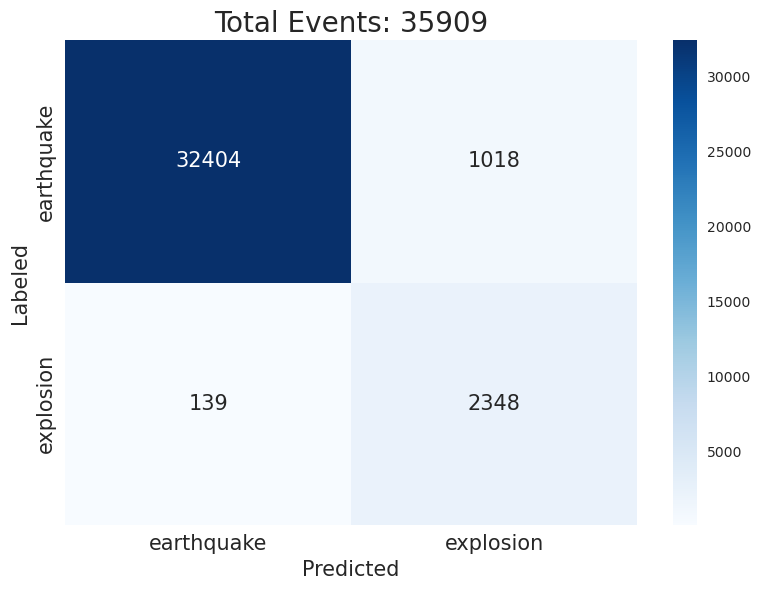

In [165]:
cf_bin = confusion_matrix(test_overall['mean_labels'].values, test_overall['assigned_class'].values)
#cf_norm = cf_events/np.sum(cf_events, axis = 1, keepdims = True)
class_labels = ['earthquake','explosion']

plt.figure(figsize = [8, 6])
ax = sns.heatmap(cf_bin, annot = True, cmap='Blues', xticklabels = class_labels, yticklabels = class_labels,  fmt="1.0f", annot_kws=annot_kws)
# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(class_labels, fontsize=15)

ax.set_xlabel('Predicted', fontsize = 15)
ax.set_ylabel('Labeled', fontsize = 15)
ax.set_title('Total Events: '+str(len(mean_labels)), fontsize = 20)
plt.tight_layout()


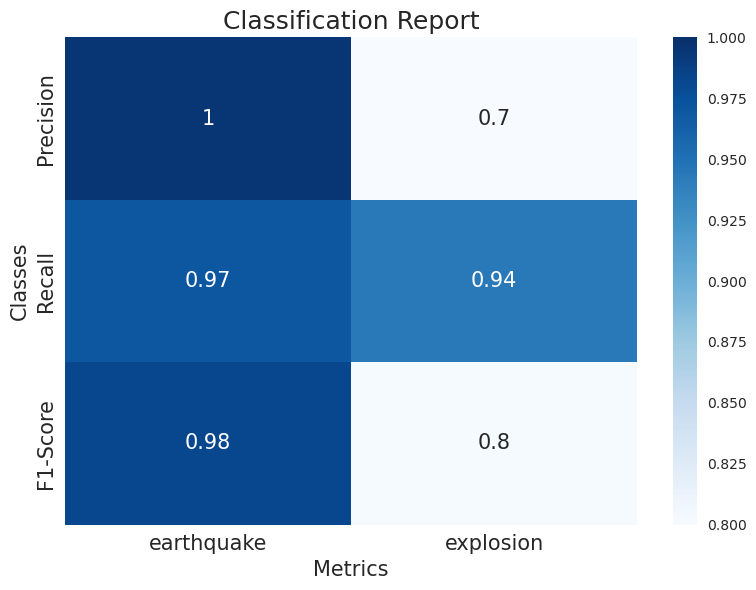

In [166]:
# Calculate the classification report
report_bin = classification_report(test_overall['mean_labels'].values, test_overall['assigned_class'].values, output_dict=True)
labels = ['Precision', 'Recall', 'F1-Score']

# Set a pleasing style
sns.set_style("whitegrid")

# Create a figure and axes for the heatmap
plt.figure(figsize = [8,6])
ax = sns.heatmap(pd.DataFrame(report_bin).iloc[:3, :2], annot=True, cmap='Blues', yticklabels=labels, xticklabels = class_labels,  vmin=0.8, vmax=1,  annot_kws=annot_kws)

# Set tick label font size
ax.set_xticklabels(class_labels, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)

# Set labels and title
ax.set_xlabel('Metrics', fontsize=15)
ax.set_ylabel('Classes', fontsize=15)
ax.set_title('Classification Report', fontsize=18)

# Create a colorbar
#cbar = ax.collections[0].colorbar
#cbar.set_ticks([0.5, 1])  # Set custom tick locations
#cbar.set_ticklabels(['0', '0.5', '1'])  # Set custom tick labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


,Unnamed: 0,Window_Length,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,Energy1/3Cor,Energy2/3Cor,int_ratio,E_0.1_1,E_1_3,E_3_10,E_10_20,E_20_50,Kurt_0.1_1,Kurt_1_3,Kurt_3_10,Kurt_10_20,Kurt_20_50,RMSDecPhaseLine,MeanFFT,MaxFFT,FMaxFFT,MedianFFT,VarFFT,FCentroid,Fquart1,Fquart3,NPeakFFT,MeanPeaksFFT,E1FFT,E2FFT,E3FFT,E4FFT,Gamma1,Gamma2,Gamma,KurtoMaxDFT,KurtoMedianDFT,MaxOverMeanDFT,MaxOverMedianDFT,NbrPeaksMaxDFT,NbrPeaksMeanDFT,NbrPeaksMedianDFT,45/46,45/47,NbrPeaksCentralFreq,NbrPeaksMaxFreq,50/51,DistMaxMeanFreqDTF,DistMaxMedianFreqDTF,DistQ2Q1DFT,DistQ3Q2DFT,DistQ3Q1DFT,Peak_Envelope_Amplitude,Average_Envelope_Amplitude,Envelope_Area,Envelope_Velocity,Envelope_Rise_Time,serial_no,source
0,0,149.99,29.772729,116.097907,1.208008,60.598228,45.555291,0.260634,5.683856,803.0,-1.908910,0.851777,-2.241092,6.915069e-310,0.488367,0.622222,0.006734,6.915181e-310,6.915181e-310,49.200444,53.364437,65.546283,6.915069e-310,0.701501,2.941119,54.491815,2.773333,0.000009,45.984023,5.503810,5.340211,30.970266,4.0,6.641958,144.328720,2.716502,0.000100,0.000085,4.828471,5.360800,NaN,47.495518,9.476983,31.533460,1.280395e+09,17.0,18.0,15.0,0.944444,1.133333,20.0,17.0,1.176471,0.001535,0.001609,0.493877,1.209070,1.702947,1.058165,0.035541,5.331215,0.035544,82.06,0,earthquake
1,0,149.99,29.673042,79.979867,0.314318,59.741957,50.817661,-0.682550,6.053937,945.0,0.088774,-0.555895,-0.159696,0.000000e+00,0.555785,0.669743,0.173908,0.000000e+00,0.000000e+00,40.646746,57.848220,76.363619,0.000000e+00,0.585476,3.181775,64.212247,2.180000,0.008203,55.227055,5.488861,5.165319,26.989768,9.0,3.893136,153.686402,5.369372,0.022392,0.000226,4.244973,4.878625,NaN,37.603502,10.281854,21.632287,1.389658e+07,18.0,16.0,20.0,1.125000,0.900000,20.0,18.0,1.111111,0.002277,0.002365,-0.605253,-1.595933,-2.201186,1.181867,0.039830,5.974447,0.039832,35.87,1,earthquake
2,0,149.99,10.253452,18.159066,0.801249,13.417580,10.278080,-0.180300,2.993588,1037.0,-9.412471,-2.728625,3.449529,5.928788e-323,0.869375,1.069565,0.584017,7.905050e-323,8.399116e-323,7.486373,16.907067,14.242355,1.037538e-322,0.551883,5.922681,136.369451,5.360000,0.000144,181.119955,5.904679,5.712258,30.968332,2.0,14.991265,289.212891,6.898152,0.001577,0.001329,5.471854,5.967030,NaN,25.877882,19.619077,28.365623,9.805138e+08,20.0,20.0,16.0,1.000000,1.250000,19.0,20.0,0.950000,0.010258,0.010547,2.022079,0.068831,2.090910,1.032402,0.100688,15.103226,0.100695,66.72,2,earthquake
3,0,149.99,23.120589,112.703670,0.667482,31.311382,20.499269,1.252514,4.201337,845.0,5.824682,-7.331101,-0.794517,5.928788e-323,0.610195,0.694352,0.150250,7.905050e-323,8.399116e-323,30.045942,30.474920,35.434365,1.037538e-322,0.513692,3.982406,76.084651,2.080000,0.003193,84.045306,5.744537,5.437666,26.816631,4.0,2.936734,192.240364,6.841365,0.007030,0.000332,4.642977,5.254754,NaN,22.775043,11.320768,44.853841,5.807031e+07,13.0,15.0,16.0,0.866667,0.812500,19.0,13.0,1.461538,0.003417,0.003553,1.577205,0.491715,2.068921,1.025241,0.044343,6.651481,0.044346,60.04,3,earthquake
4,0,149.99,10.240232,30.554894,0.273692,10.024981,6.487829,0.118927,2.356968,607.0,30.578640,-42.580504,-0.718137,5.928788e-323,1.056180,1.016972,0.329657,7.905050e-323,8.399116e-323,8.663162,11.654058,18.064610,1.037538e-322,0.529659,5.686164,152.188744,2.766667,0.009974,210.697883,4.735256,4.614332,27.985412,3.0,6.845480,280.859827,3.392756,0.041310,0.000492,3.702554,4.254467,NaN,4.892844,27.843234,37.354756,5.732125e+07,18.0,14.0,20.0,1.285714,0.900000,21.0,18.0,1.166667,0.010729,0.011055,-0.118603,0.131731,0.013129,1.067420,0.104238,15.635673,0.104245,32.23,4,earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,0,149.99,30.841548,87.995700,0.534582,42.592345,30.935670,-0.815543,4.869022,999.0,-1.288963,1.

In [186]:
features_earthquake_physical['DistMaxMedianFreqDTF']

0        0.001609
1        0.002365
2        0.010547
3        0.003553
4        0.011055
           ...   
42439    0.002841
42440    0.000736
42441    0.001623
42442    0.004070
42443    0.000420
Name: DistMaxMedianFreqDTF, Length: 164440, dtype: float64

In [185]:
X_test['DistMaxMedianFreqDTF']

uw10547658    0.00633
uw10547658    0.00633
uw10547658    0.00633
uw10547683    0.00633
uw10547718    0.00633
               ...   
uw61898721    0.00633
uw61899421    0.00633
uw61899421    0.00633
uw61899426    0.00633
uw61900686    0.00633
Name: DistMaxMedianFreqDTF, Length: 121720, dtype: float64

In [179]:
features = scaler_params['Feature'].values
for i in range(len(scaler_params)):
    X_test.loc[:,features[i]] = X_test.loc[:,features[i]]*(scaler_params.iloc[i,2]) + scaler_params.iloc[i,1]
    
    
misclassified_df = X_test.loc[misclassified_ids]
misclassified_eq = misclassified_df[misclassified_df['classified'] == 1]
misclassified_exp = misclassified_df[misclassified_df['classified'] == 0]

In [187]:
X_test

,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,Energy1/3Cor,Energy2/3Cor,int_ratio,E_0.1_1,E_1_3,E_3_10,E_10_20,E_20_50,Kurt_0.1_1,Kurt_1_3,Kurt_3_10,Kurt_10_20,Kurt_20_50,RMSDecPhaseLine,MeanFFT,MaxFFT,FMaxFFT,MedianFFT,VarFFT,FCentroid,Fquart1,Fquart3,NPeakFFT,MeanPeaksFFT,E1FFT,E2FFT,E3FFT,E4FFT,Gamma1,Gamma2,KurtoMaxDFT,KurtoMedianDFT,MaxOverMeanDFT,MaxOverMedianDFT,NbrPeaksMaxDFT,NbrPeaksMeanDFT,NbrPeaksMedianDFT,45/46,45/47,NbrPeaksCentralFreq,NbrPeaksMaxFreq,50/51,DistMaxMeanFreqDTF,DistMaxMedianFreqDTF,DistQ2Q1DFT,DistQ3Q2DFT,DistQ3Q1DFT,Peak_Envelope_Amplitude,Average_Envelope_Amplitude,Envelope_Area,Envelope_Velocity,Envelope_Rise_Time,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,0_FFT mean coefficient_37,0_FFT mean coefficient_38,0_FFT mean coefficient_39,0_FFT mean coefficient_40,0_FFT mean coefficient_41,0_FFT mean coefficient_42,0_FFT mean coefficient_43,0_FFT mean coefficient_44,0_FFT mean coefficient_45,0_FFT mean coefficient_46,0_FFT mean coefficient_47,0_FFT mean coefficient_48,0_FFT mean coefficient_49,0_FFT mean coefficient_50,0_FFT mean coefficient_51,0_FFT mean coefficient_52,0_FFT mean coefficient_53,0_FFT mean coefficient_54,0_FFT mean coefficient_55,0_FFT mean coefficient_56,0_FFT mean coefficient_57,0_FFT mean coefficient_58,0_FFT mean coefficient_59,0_FFT mean coefficient_60,0_FFT mean coefficient_61,0_FFT mean coefficient_62,0_FFT mean coefficient_63,0_FFT mean coefficient_64,0_FFT mean coefficient_65,0_FFT mean coefficient_66,0_FFT mean coefficient_67,0_FFT mean coefficient_68,0_FFT mean coefficient_69,0_FFT mean coefficient_70,0_FFT mean coefficient_71,0_FFT mean coefficient_72,0_FFT mean coefficient_73,0_FFT mean coefficient_74,0_FFT mean coefficient_75,0_FFT mean coefficient_76,0_FFT mean coefficient_77,0_FFT mean coefficient_78,0_FFT mean coefficient_79,0_FFT mean coefficient_80,0_FFT mean coefficient_81,0_FFT mean coefficient_82,0_FFT mean coefficient_83,0_FFT mean coefficient_84,0_FFT mean coefficient_85,0_FFT mean coefficient_86,0_FFT mean coefficient_87,0_FFT mean coefficient_88,0_FFT mean coefficient_89,0_FFT mean coefficient_90,0_FFT mean coefficient_91,0_FFT mean coefficient_92,0_FFT mean coefficient_93,0_FFT mean coefficient_94,0_FFT mean coefficient_95,0_FFT mean coefficient_96,0_FFT mean coefficient_98,0_FFT mean coefficient_99,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,0_FFT mean coefficient_107,0_FFT mean coefficient_113,0_FFT mean coefficient_114,0_FFT mean coefficient_116,0_FFT mean coefficient_117,0_FFT mean coefficient_118,0_FFT mean coefficient_125,0_FFT mean coefficient_126,0_FFT mean coefficient_127,0_FFT mean coefficient_128,0_FFT mean coefficient_129,0_FFT mean coefficient_130,0_FFT mean coefficient_131,0_FFT mean coefficient_132,0_FFT mean coefficient_133,0_FFT mean coefficient_134,0_FFT mean coefficient_135,0_FFT mean coefficient_136,0_FFT mean coefficient_137,0_FFT mean coefficient_138,0_FFT mean coeffici

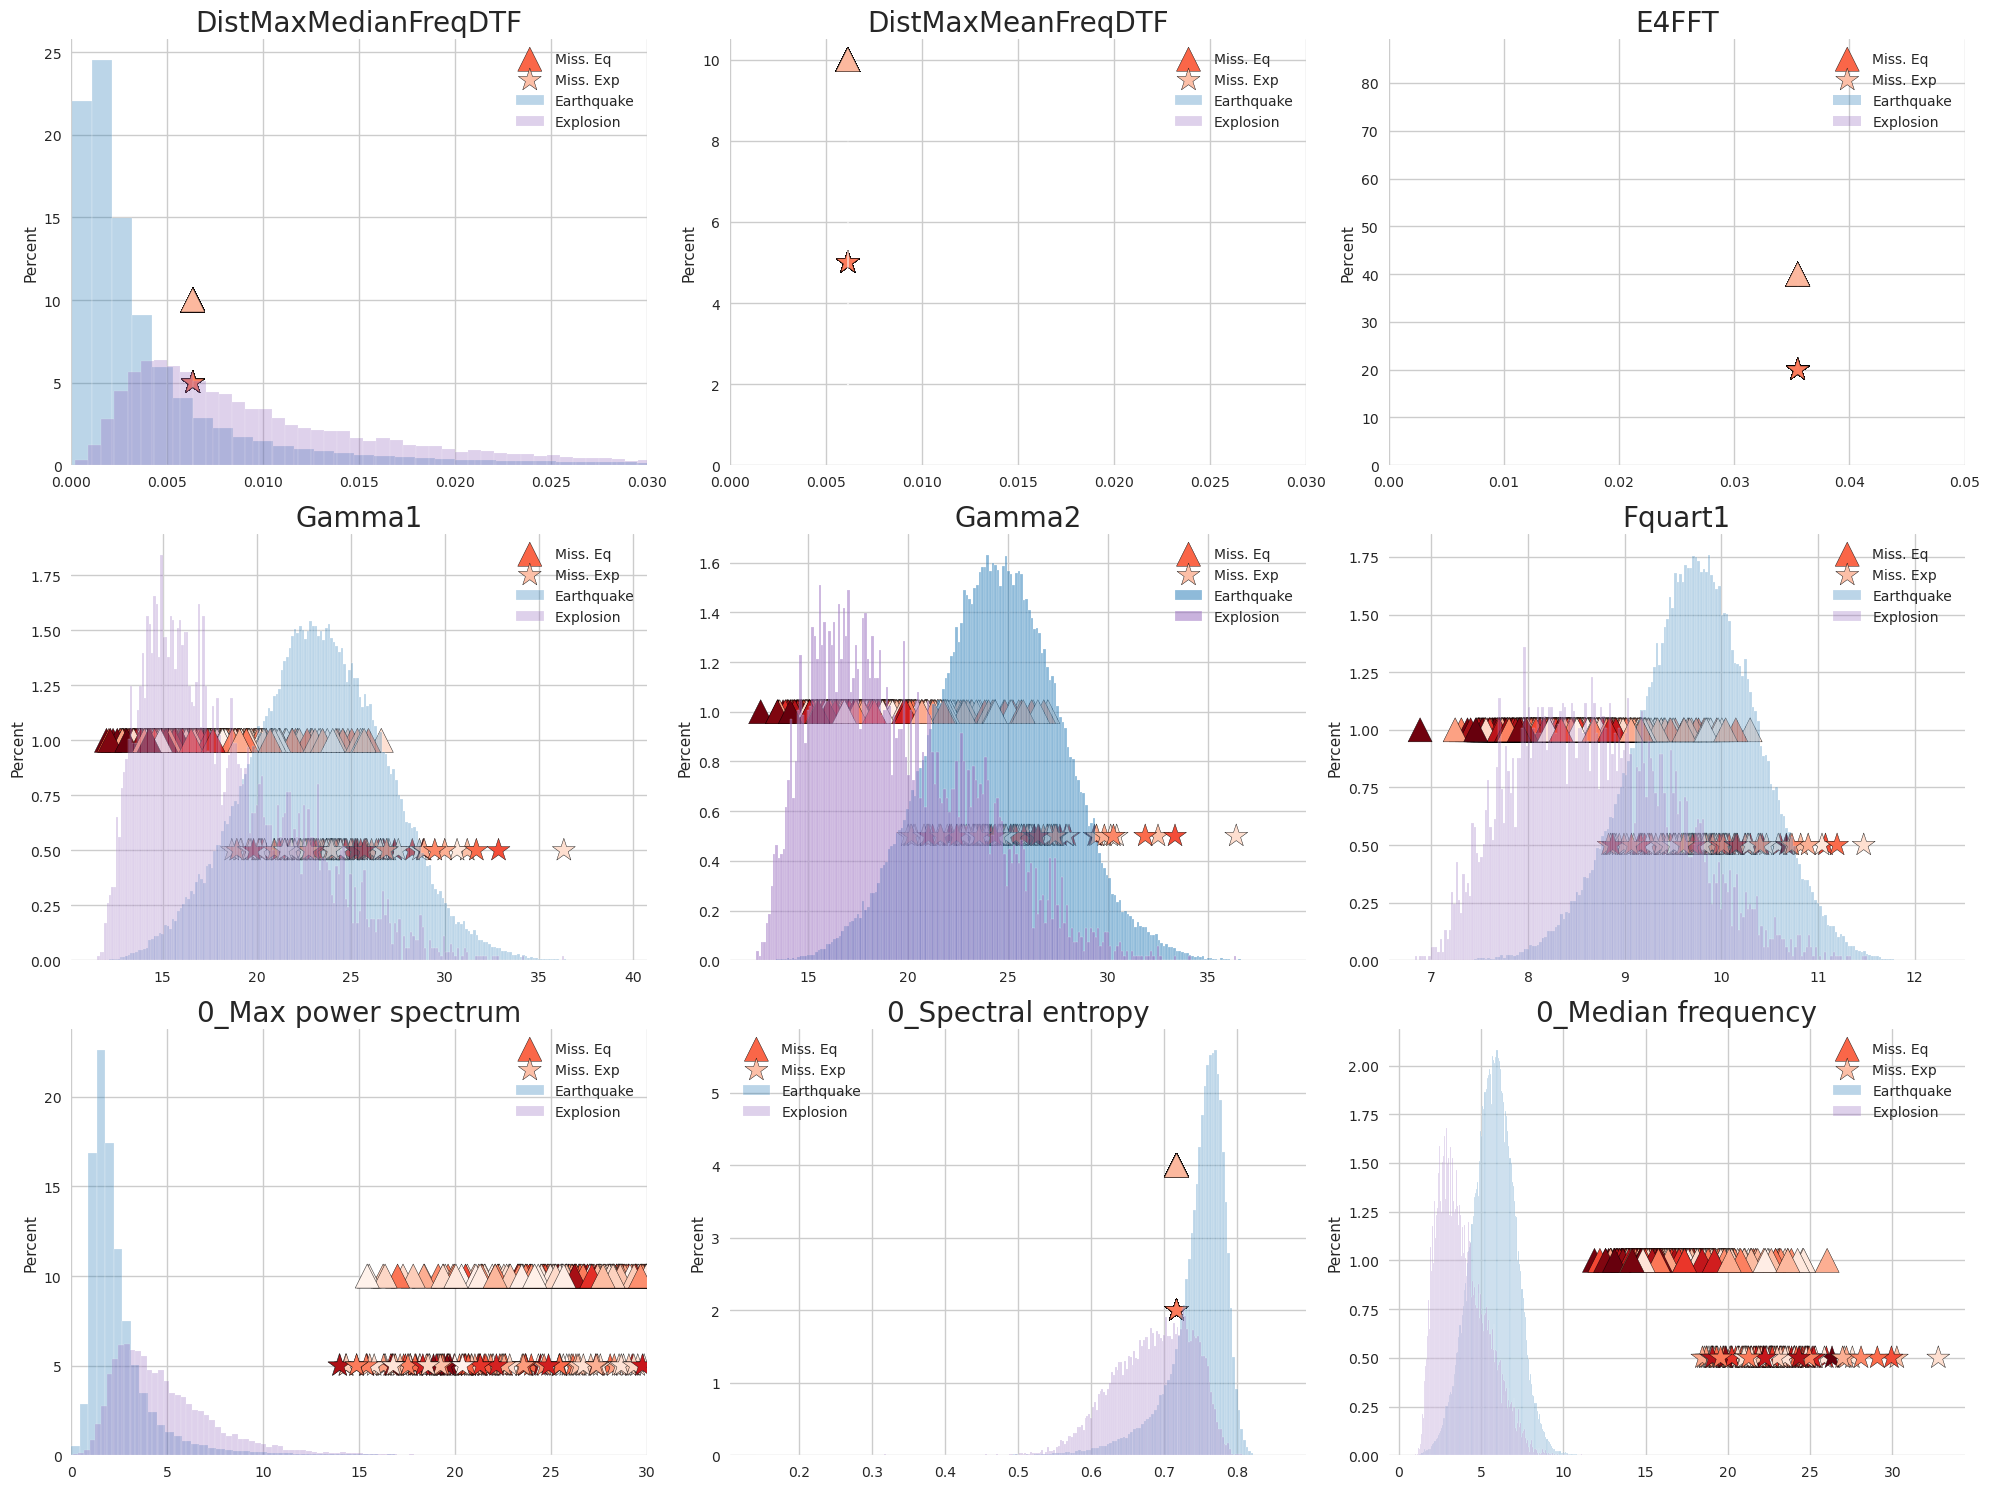

In [188]:
new_eq = X_test[X_test['source']  == 'earthquake']
new_exp = X_test[X_test['source']  == 'explosion']  #features_explosion_physical


fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = [20,15])

feature = 'DistMaxMedianFreqDTF'


l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= features_earthquake_physical[feature].values, bins= num_bins, kde=False, ax = ax[0,0],  
             multiple='stack', stat = 'percent', color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= features_explosion_physical[feature].values, bins=num_bins, kde=False, ax = ax[0,0],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')

X_miss_earthquake = misclassified_eq[misclassified_eq['px_probability'] > 0.8]
X_miss_explosion = misclassified_exp[misclassified_exp['eq_probability'] > 0.8]



ax[0,0].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*10, s = 300, ec = 'k', marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[0,0].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*5, s = 300, ec = 'k', marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')


#ax[0,0].scatter(X_miss_explosion[feature].values[np.where(probs_miss_explosion > 0.9)[0]], np.ones(len(X_miss_explosion.iloc[np.where(probs_miss_explosion > 0.9)[0]]))*0.5, s = 50, marker = 'o',ec = 'k',c = probs_miss_explosion[np.where(probs_miss_explosion > 0.9)[0]], cmap = 'magma',label = 'Miss. exp')
ax[0,0].legend()
#ax[0,0].set_xscale('log')
ax[0,0].set_xlim(l1,0.03)




ax[0,0].set_title(feature, fontsize = 20)





feature = 'DistMaxMeanFreqDTF'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[0,1],  
             multiple='stack',  stat = 'percent', color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[0,1],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')




ax[0,1].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*10,ec = 'k', s = 300, marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[0,1].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*5,ec = 'k',  s = 300, marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')




ax[0,1].legend()
#ax[0,0].set_xscale('log')
ax[0,1].set_xlim(l1,0.03)


ax[0,1].set_title(feature, fontsize = 20)






feature = 'E4FFT'

l1 = -0.35
l2 = -0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int(data_range/ 0.05)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= 2000, kde=False, ax = ax[0,2],  
             multiple='stack',  stat = 'percent', color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins= 10, kde=False, ax = ax[0,2],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')


ax[0,2].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*40,ec = 'k',  s = 300, marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[0,2].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*20, ec = 'k', s = 300, marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')
ax[0,2].legend()
#ax[0,2].set_xscale('log')
ax[0,2].set_xlim(0,0.05)


ax[0,2].set_title(feature, fontsize = 20)




feature = 'Gamma1'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[1,0],  
             multiple='stack',  stat = 'percent', color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[1,0],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')
#ax[1,0].scatter(X_miss_earthquake[feature].values[np.where(probs_miss_earthquake > 0.9)[0]], np.ones(len(X_miss_earthquake.iloc[np.where(probs_miss_earthquake > 0.9)[0]]))*1, s = 50, marker = '^',ec = 'k',c = probs_miss_earthquake[np.where(probs_miss_earthquake > 0.9)[0]], cmap = 'magma',label = 'Miss. eqs')
#ax[1,0].scatter(X_miss_explosion[feature].values[np.where(probs_miss_explosion > 0.9)[0]], np.ones(len(X_miss_explosion.iloc[np.where(probs_miss_explosion > 0.9)[0]]))*0.5, s = 50, marker = 'o',ec = 'k',c = probs_miss_explosion[np.where(probs_miss_explosion > 0.9)[0]], cmap = 'magma',label = 'Miss. exp')

ax[1,0].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*1, s = 300, ec = 'k', marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[1,0].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*0.5, s = 300, ec = 'k', marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')

ax[1,0].legend()
#ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(l1,0.02)


ax[1,0].set_title(feature, fontsize = 20)





feature = 'Gamma2'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[1,1],  
             multiple='stack', stat = 'percent', color =  '#1f77b4', alpha = 0.5, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[1,1],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.5, label = 'Explosion')


ax[1,1].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*1, s = 300, ec = 'k', marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[1,1].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*0.5, s = 300, ec = 'k', marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')


ax[1,1].legend()
#ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(l1,0.02)


ax[1,1].set_title(feature, fontsize = 20)






feature = 'Fquart1'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[1,2],  
             multiple='stack',  stat = 'percent', color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[1,2],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')


ax[1,2].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*1, s = 300, ec = 'k', marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[1,2].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*0.5, s = 300, ec = 'k', marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')
ax[1,2].legend()
#ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(l1,0.02)


ax[1,2].set_title(feature, fontsize = 20)






new_eq = features_earthquake_tsfel
new_exp = features_explosion_tsfel












feature = '0_Max power spectrum'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[2,0],  
             multiple='stack', stat = 'percent',  color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[2,0],  
             multiple='stack', stat = 'percent', color = '#9467bd', alpha = 0.3, label = 'Explosion')



ax[2,0].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*10, s = 300,ec = 'k', marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[2,0].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*5, s = 300, ec = 'k', marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')
ax[2,0].legend()
#ax[0,0].set_xscale('log')
ax[2,0].set_xlim(0,30)


ax[2,0].set_title(feature, fontsize = 20)






feature = '0_Spectral entropy'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[2,1],  
             multiple='stack', stat = 'percent',  color =  '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[2,1],  
             multiple='stack', stat = 'percent',  color = '#9467bd', alpha = 0.3, label = 'Explosion')


ax[2,1].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*4, s = 300, marker = '^',ec = 'k',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[2,1].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*2, s = 300, marker = '*',ec = 'k', c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')

ax[2,1].legend()
#ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(l1,0.02)


ax[2,1].set_title(feature, fontsize = 20)





feature = '0_Median frequency'

l1 = 0
l2 = 0.1

all_df = features_all
data_range = all_df[feature].values.ptp()
num_bins = int((l2 - l1)/ 0.0005)
#sns.histplot(x= no_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0], 
#             multiple='stack', stat = 'percent', color = 'green', alpha = 0.5,label = 'Noise')
#sns.histplot(x= su_df[feature].values, bins= num_bins, kde=False, ax = ax[0,0],   
#             multiple='stack', stat = 'percent', color = 'red', alpha = 0.5, label = 'Surface')
sns.histplot(x= new_eq[feature].values, bins= num_bins, kde=False, ax = ax[2,2],  
             multiple='stack', stat = 'percent',  color = '#1f77b4', alpha = 0.3, label = 'Earthquake')
sns.histplot(x= new_exp[feature].values, bins=num_bins, kde=False, ax = ax[2,2],  
             multiple='stack', stat = 'percent',  color = '#9467bd', alpha = 0.3, label = 'Explosion')



ax[2,2].scatter(X_miss_earthquake[feature].values, np.ones(len(X_miss_earthquake))*1, ec = 'k',s = 300, marker = '^',c = X_miss_earthquake['px_probability'], cmap = 'Reds',label = 'Miss. Eq')
ax[2,2].scatter(X_miss_explosion[feature].values, np.ones(len(X_miss_explosion))*0.5, ec = 'k', s = 300, marker = '*',c = X_miss_explosion['eq_probability'], cmap = 'Reds',label = 'Miss. Exp')


ax[2,2].legend()
#ax[2,2].colorbar()
#ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(l1,0.02)


ax[2,2].set_title(feature, fontsize = 20)

plt.tight_layout()

In [ ]:
 `